## About Dataset 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

## Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Objective of the analysis
To correctly classify between edible and poisonous mushrooms.

## Load the libraries

In [23]:
# Manipulating and reading data
import numpy as np
import pandas as pd
from scipy import stats
import itertools
np.set_printoptions(precision=2)

# Visual
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import plot_tree

# Dimensional reduction
from sklearn.manifold import TSNE

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, KFold

# Training/test set
from sklearn.model_selection import train_test_split

# Scaling
# Note: Scaling is important for SVC model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Encode
from sklearn.preprocessing import LabelEncoder

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [24]:
df = pd.read_csv("mushrooms.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- The dataset has 8124 rows and 23 columns
- The datatype are all objects

In [26]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [27]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


- There are no null values in the data, each columns shows 8124 rows of data.
- As stated in the attribute information above, all the columns are categorical, hence, we can convert it using labelEncoder

## Data Wrangling

### Lets check the percentage of edible plant to poisonous

e    0.517971
p    0.482029
Name: class, dtype: float64


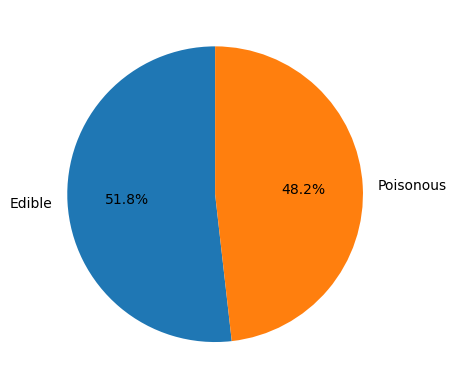

In [28]:
print(df["class"].value_counts(normalize=True))
plt.pie(x=df["class"].value_counts(), labels=["Edible", "Poisonous"], autopct="%1.1f%%", startangle=90)
plt.show()

The class are almost balance with 51.8% edible mushrooms and 48.2% poisonous mushrooms.

### Lets check for each feature, the unique count of each attribute

In [29]:
for feat in df.columns:
    df[feat] = df[feat].astype('category')
    print(df[feat].value_counts())
    print("="*50)

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

- there are 2480 records with ? in stalk root, there is missing data for these records on the stalk root types
- The column "veil-type" has only one type, hence, we can drop this column since it is not useful
- Most of the features are imbalance, which could mean that some of the variant are either rare or uncommon.

In [30]:
df.drop(columns="veil-type", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## Exploratory Data Analysis (EDA)

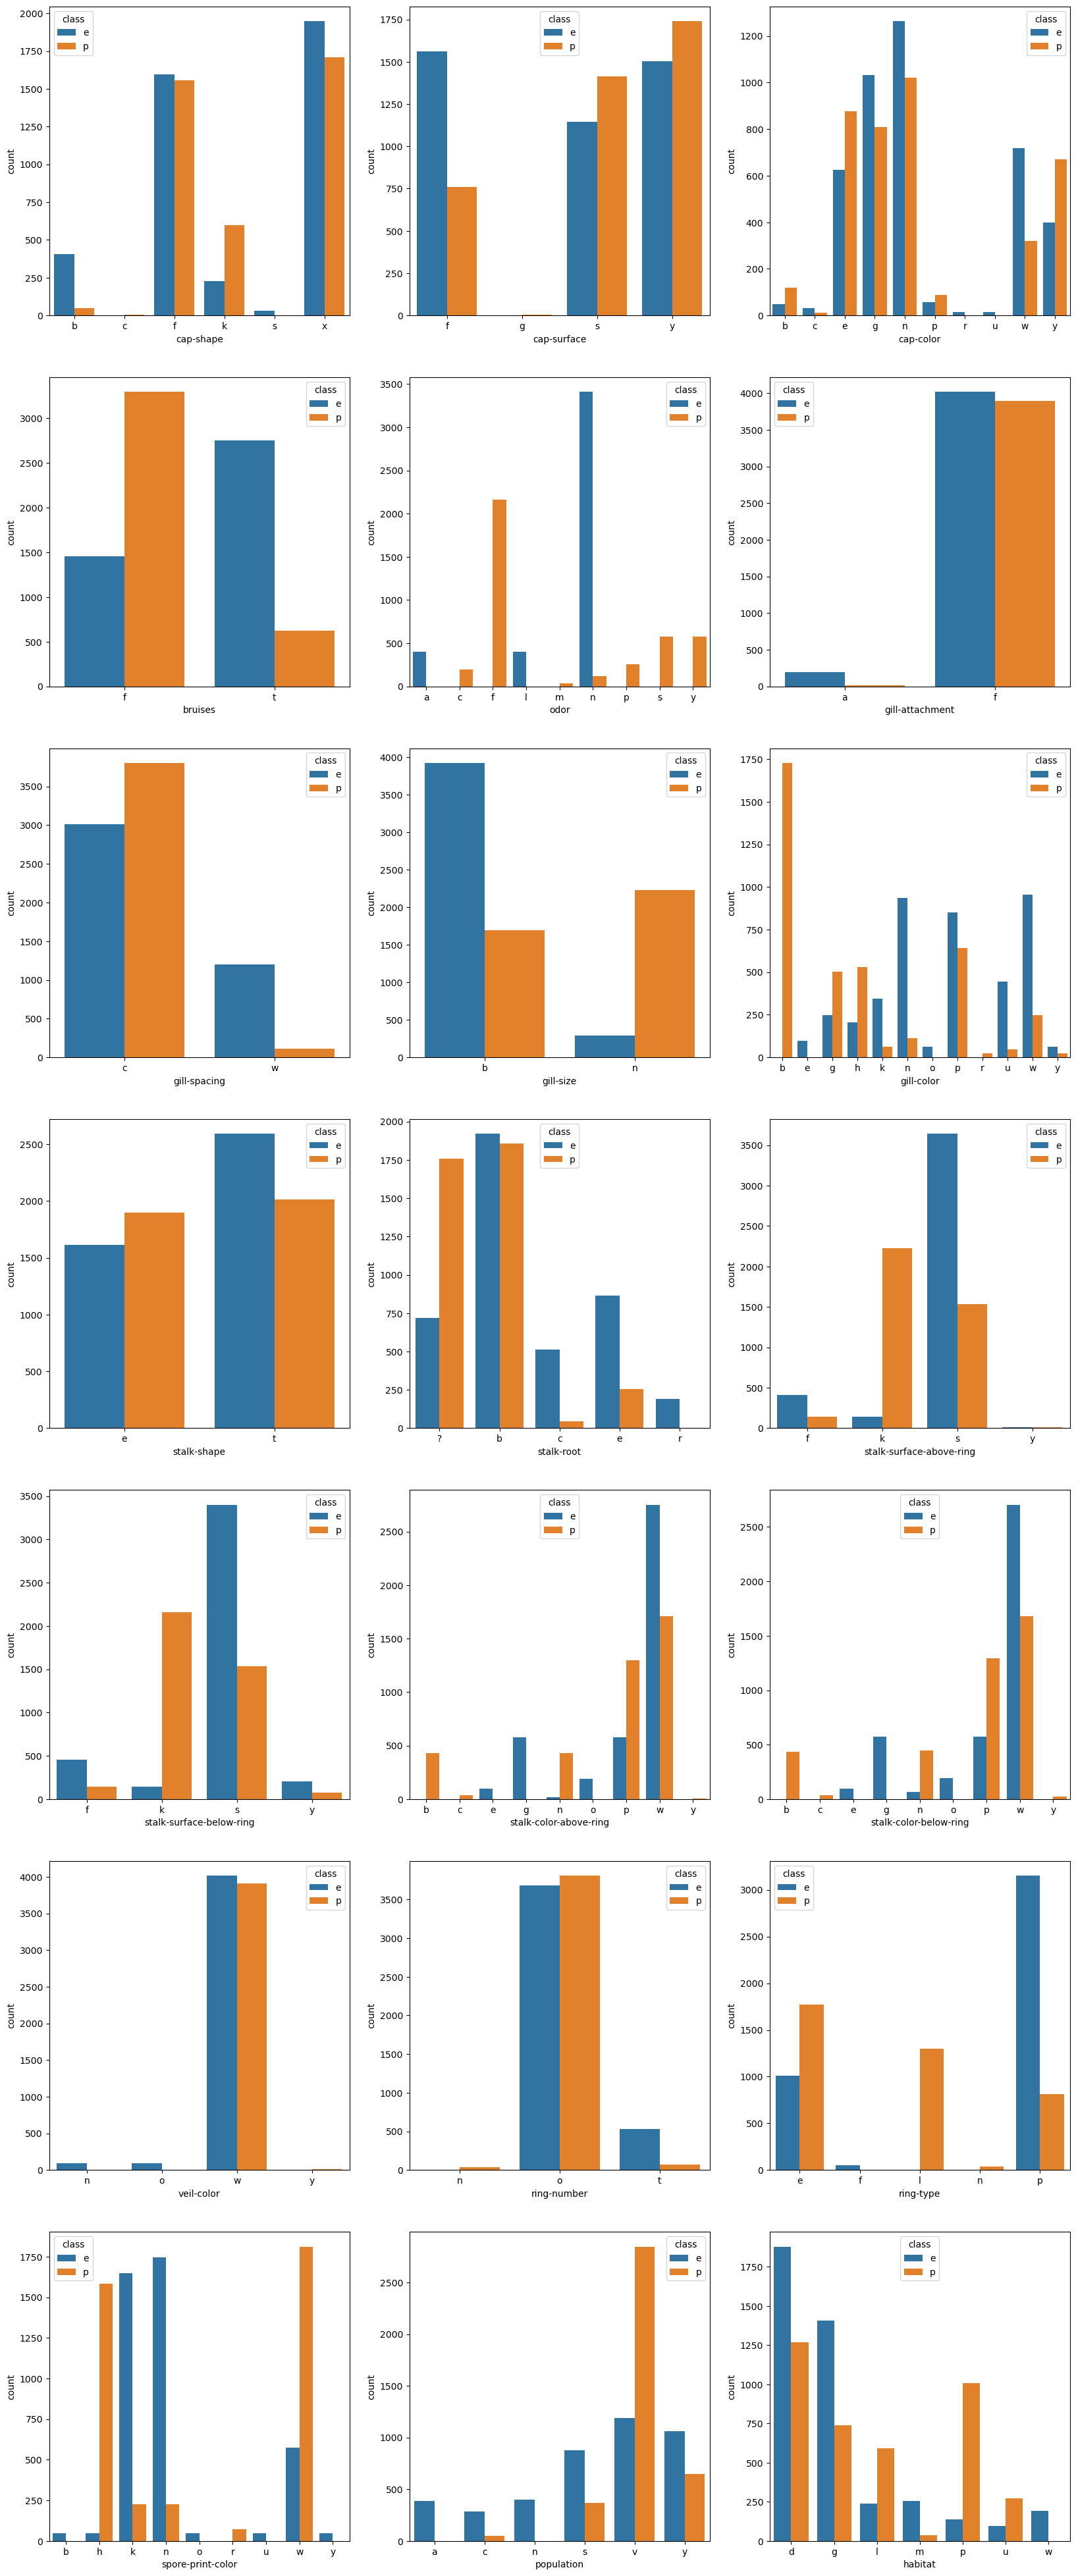

In [31]:
# plot countplot by edible and poisonous group for each feature except for class column
plt.figure(figsize=(20, 50))
#plt.subplots(nrows=len(df.columns)//3, ncols=3, sharey=True, figsize=(20,50))
for i in range(1, len(df.columns)):
    ax = plt.subplot(len(df.columns)//3, 3, i)
    sns.countplot(data=df, x=df.columns[i], ax=ax, hue='class')
    
plt.show()

### Lets Check what inference we can make from the characteristics of edible mushroom based on above chart

1. From cap-shape, most of b=bell, s=sunken, x=convex shaped mushroom are edible, while c=conical, k=knobbed shaped mushroom are mostly poisonous. f=flat shaped mushrooms have almost the same count for both edible and poisonous.
2. From cap-surface, most of the fibrous (f) types are edible while mushrooms with s=smooth and y=scaly cap surface are mostly poisonous.
3. From cap-color, g=gray,n=brown,r=green,u=purple,w=white,c=cinnamon are mostly edible while b=buff,e=red,p=pink,y=yellow are mostly poisonous.
4. From bruises, most of the f=no-bruise mushroom are poisonous while most of t=bruise mushrooms are edible. 
5. Based on odor, c=creosote, f=foul, m=musty, p=pungent, s=spicy, y=fishy odor mushrooms are mostly poisonous, while a=almond, l=anise, n=none odor mushrooms are mostly edible.
6. Based on gill-attachment, most of a=attached type are edible, while f-free type are both equally edible and poisonous.
7. Based on gill-spacing, most of the c-closed spaced gill type are poisonous while w=crowded spaced gill are mostly edible.
8. Based on gill-size, most of the b=broad gill size mushrooms are edible while the narrow gill sized mushrooms are mostly poisonous.
9. Based on gill-color, most of b=buff, g=gray, h=chocolate, r=green colored gill mushrooms are poisonous while the others (e=red, k=black, n=brown, o=orange, p=pink, u=purple, w=white, y=yellow) colored gills are mostly edible.
10. Based on stalk-shape, most of e=enlarging type are poisonous while t=tapering types are mostly edible.
11. Based on stalk-root, b=bulbous,c=club,e=equal,r=rhizomorphs types are mostly edible, while the **missing values "?" seems to be mostly poisonous**.
12. Based on stalk-surface-above-ring, most of f=fibrous and s=smooth types are edible, while k=silky types are mostly poisonous. For y=scaly types they are equally poisonous and edible.
13. Based on stalk-surface-below-ring, most of f=fibrous, s=smooth and y=scaly types are edible, while k=silky types are mostly poisonous.
14. Based on stalk-color-above-ring, most of b=buff,c=cinnamon,n=brown,p=pink,y=yellow color stalk are poisonous while e=red, g=gray, o=orange, w=white color stalk are mostly edible.
15. Based on viel-color, n=brown,o=orange, w=white colored veil are mostly edible while y=yellow colored viel are mostly poisonous
16. On the quantity of ring-number, mushrooms having either n=none or o=one ring are mostly poisonous while t=two rings are mostly edible.
17. On the ring-type, it can be seen that most of the mushrooms having either e=evanescent,l=large or n=none ring are mostly poisonous while mushrooms with f=flaring and p=pendant ring type are mostly edible.
18. From spore-sprint-color, it seems that most of the b=buff,k=black,n=brown,o=orange,u=purple,y=yellow colored mushrooms are edible, while the others (h=chocolate, w=white, r=green) are mostly poisonous
19. On the population of mushrooms, it can be seen that area with highly a=abudant, c=clustered, n=numerous, s=scattered, y=solitary have the most edible mushrooms while v=several area consist of mostly poisonous mushrooms
20. In regards to habitat, d=woods, g=grases, m=meadows, w=waste land have the highest number of edible mushrooms while l=leaves, p=paths, u=urban habitat have the highest number of poisonous mushrooms

## Preprocessing

In [32]:
le = LabelEncoder()
for col in df.columns:
    df_encode = df.apply(le.fit_transform)
df_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Here, class is encoded to 1-poisonous and 0-edible

In [33]:
# Create list of class for easy mapping
classes = ['Edible[0]', 'Poisonous[1]']

In [34]:
# Create a dict to store multiple dict for the scores of different model for later output
model_scores = {}

In [45]:
# Define some standard functions
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [36]:
# Now, seperate the data into training and test set
X = df_encode.drop(['class'], axis=1)
Y = df_encode['class']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Use K Fold for better results
# We do not need to use StratifiedKFold since model is almost balance
kf = KFold(shuffle=True, random_state=4, n_splits=5)
def train_model(model, model_name, X_data, y_data, scale=False):
    train_acc_score = []
    test_acc_score = []
    avg_scores = []
    print(model)
    for train_index, test_index in kf.split(X_data):
        X_train, X_test, y_train, y_test = (X_data.iloc[train_index, :], X_data.iloc[test_index, :], y_data[train_index], y_data[test_index])
        
        if scale:
            s = StandardScaler()
            X_train_scale = s.fit_transform(X_train)
            model.fit(X_train_scale, y_train)
        else:
            model.fit(X_train, y_train)
            
        train_acc_score.append(accuracy_score(y_train, model.predict(X_train)))
        yhat = model.predict(X_test)
        test_acc_score.append(accuracy_score(y_test, yhat))
        
        
        print('Dataset before split:', X_data.shape, y_data.shape)
        print('Train set after split:', X_train.shape, y_train.shape)
        print('Test set after split:', X_test.shape, y_test.shape)
        print(classification_report(y_test, yhat))
        cm = confusion_matrix(y_test, yhat)
        plot_confusion_matrix(cm, classes=classes, normalize=False, title=f'Confusion Matrix {model_name}')
        avg_scores.append(precision_recall_fscore_support(y_test, yhat, average='weighted')[:-1])
        
    print(f'Average Train Accuracy Score of Model: {np.mean(train_acc_score):.2f}')
    print(f'Average Test Accuracy Score of Model: {np.mean(test_acc_score):.2f}')
    col_names = ['Precision', 'Recall', 'F1 Score']
    print(pd.DataFrame(avg_scores, columns=col_names))
    model_scores[model_name]= list(np.mean(avg_scores, axis=0))
    for sc, sc_val in list(zip(col_names, np.mean(avg_scores, axis=0))):
        print(f"Average {sc}: {sc_val:.3f}")
    return model

Since all the columns are encoded, we do not need to perform scaling.

### Logistic Regression

LogisticRegression()
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       845
           1       0.96      0.95      0.95       780

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix, without normalization
[[812  33]
 [ 41 739]]


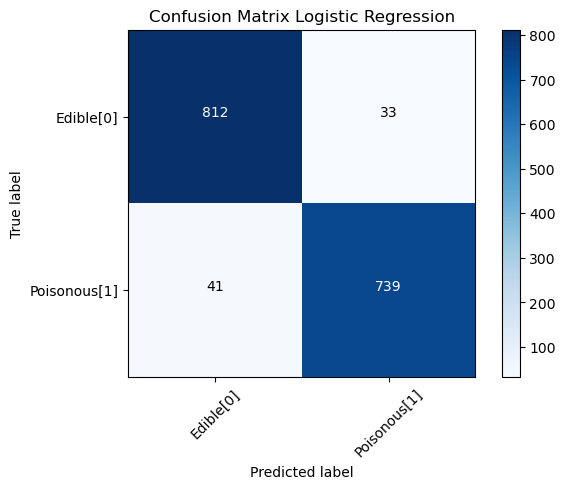

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       846
           1       0.95      0.93      0.94       779

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

Confusion Matrix, without normalization
[[807  39]
 [ 56 723]]


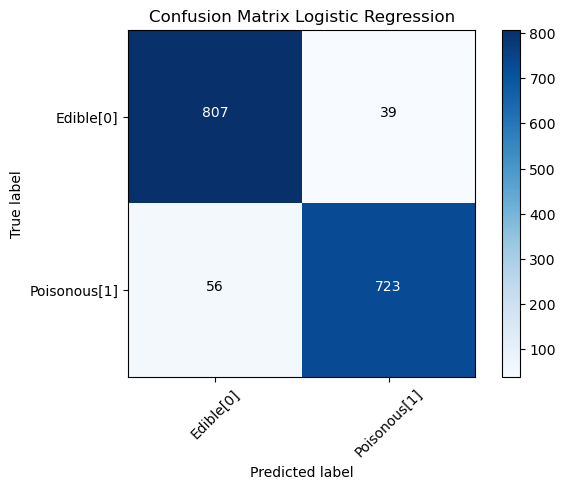

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       823
           1       0.96      0.94      0.95       802

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix, without normalization
[[789  34]
 [ 47 755]]


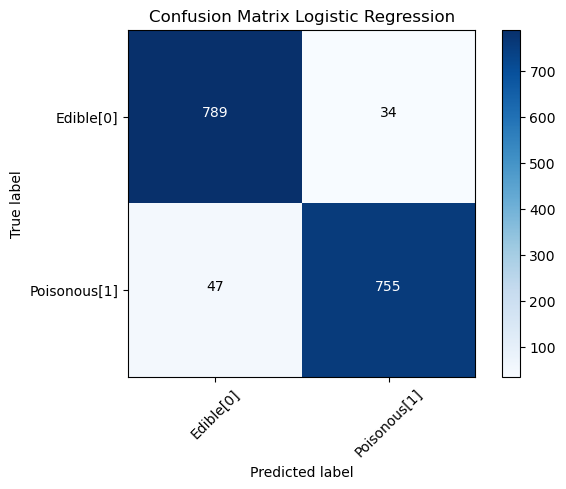

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       837
           1       0.96      0.94      0.95       788

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix, without normalization
[[803  34]
 [ 46 742]]


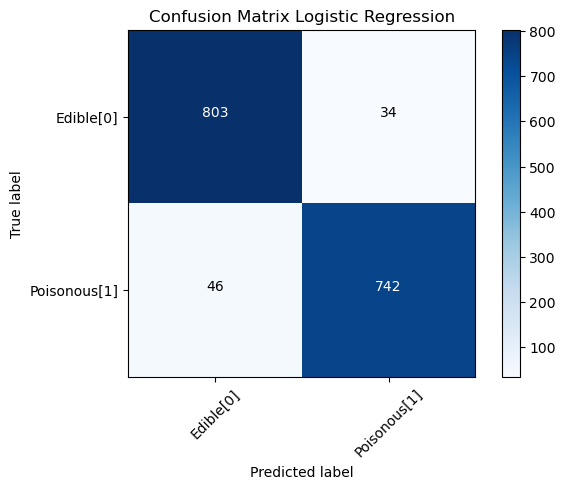

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       857
           1       0.96      0.95      0.95       767

    accuracy                           0.96      1624
   macro avg       0.96      0.95      0.95      1624
weighted avg       0.96      0.96      0.96      1624

Confusion Matrix, without normalization
[[824  33]
 [ 40 727]]


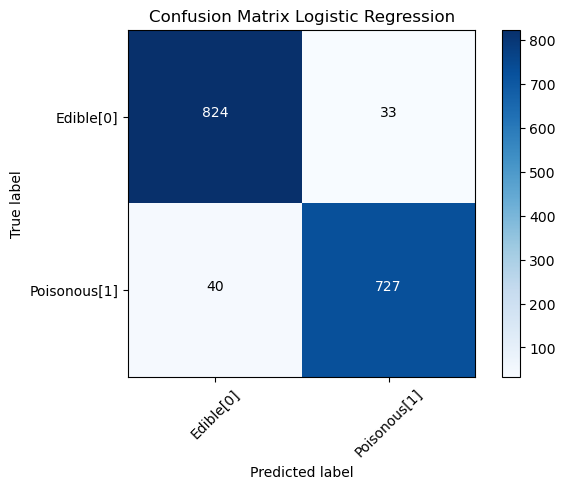

Average Train Accuracy Score of Model: 0.95
Average Test Accuracy Score of Model: 0.95
   Precision    Recall  F1 Score
0   0.954488  0.954462  0.954451
1   0.941682  0.941538  0.941507
2   0.950259  0.950154  0.950145
3   0.950846  0.950769  0.950756
4   0.955062  0.955049  0.955038
Average Precision: 0.950
Average Recall: 0.950
Average F1 Score: 0.950


LogisticRegression()

In [37]:
# define logistic regression model
train_model(LogisticRegression(), 'Logistic Regression', X, Y, scale=False)

### SVC

SVC()
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       845
           1       1.00      0.98      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[844   1]
 [ 15 765]]


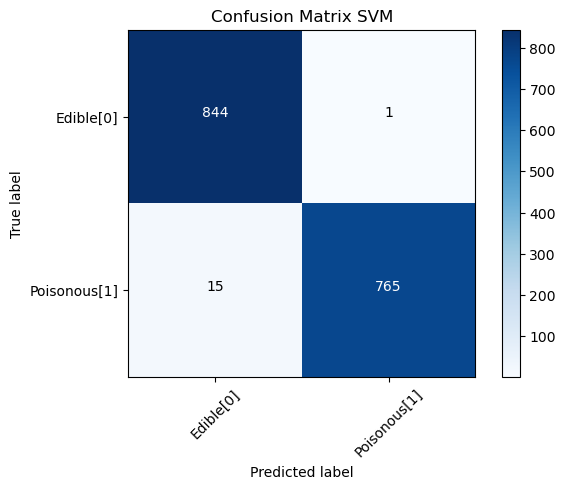

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.98      0.99       779

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[845   1]
 [ 14 765]]


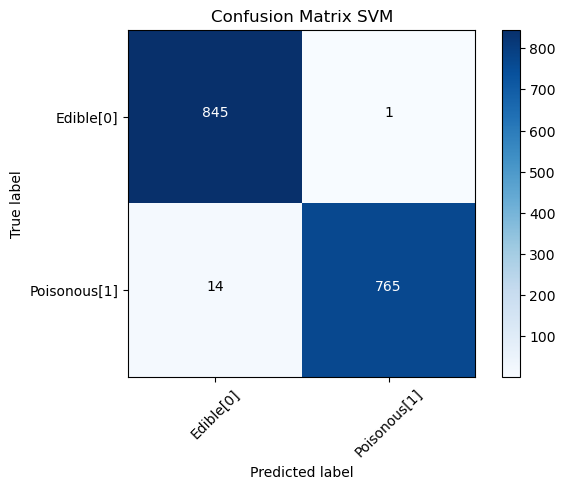

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       823
           1       1.00      0.99      0.99       802

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[822   1]
 [ 10 792]]


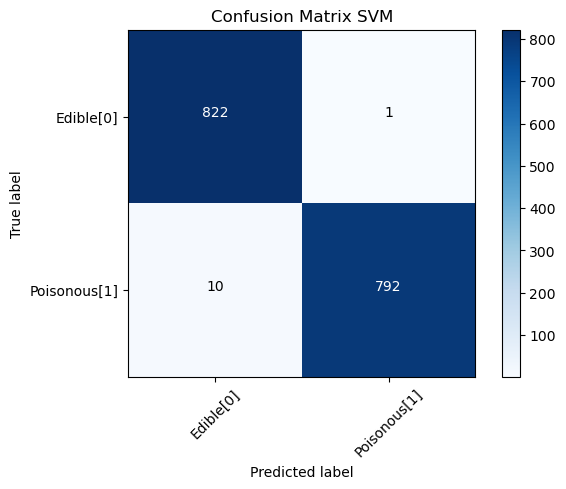

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       837
           1       1.00      0.98      0.99       788

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[837   0]
 [ 19 769]]


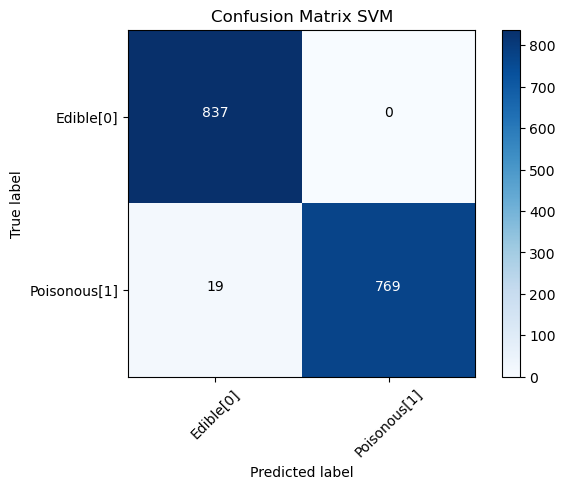

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       1.00      0.98      0.99       767

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

Confusion Matrix, without normalization
[[856   1]
 [ 14 753]]


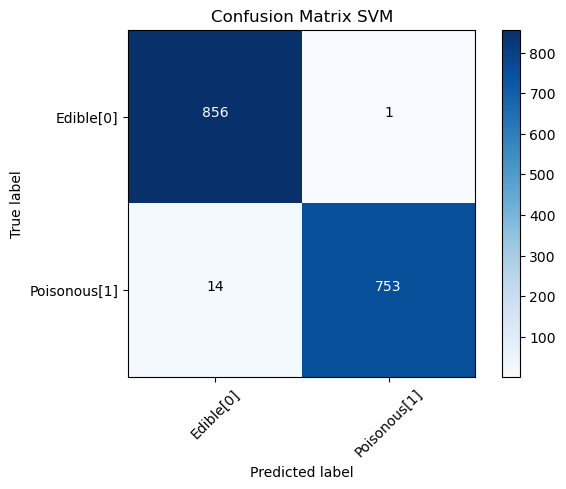

Average Train Accuracy Score of Model: 0.99
Average Test Accuracy Score of Model: 0.99
   Precision    Recall  F1 Score
0   0.990293  0.990154  0.990150
1   0.990889  0.990769  0.990766
2   0.993290  0.993231  0.993230
3   0.988567  0.988308  0.988302
4   0.990882  0.990764  0.990759
Average Precision: 0.991
Average Recall: 0.991
Average F1 Score: 0.991


In [50]:
svc_model = train_model(SVC(kernel='rbf'), 'SVM', X, Y, scale=False)

### KNN

KNeighborsClassifier()
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[843   2]
 [  0 780]]


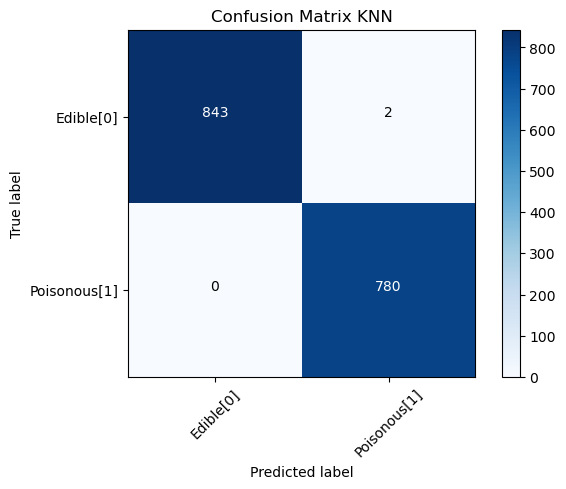

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[844   2]
 [  0 779]]


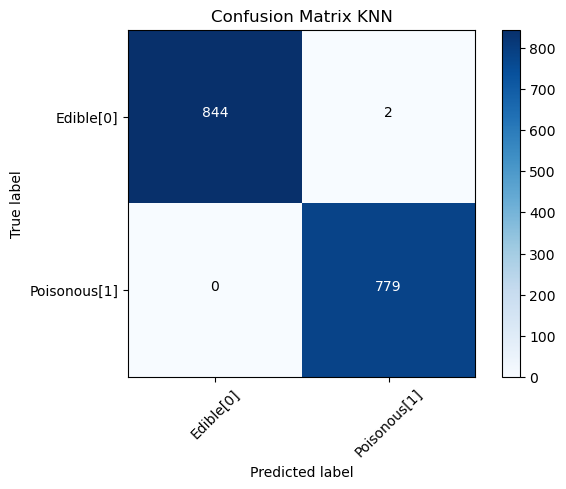

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[820   3]
 [  0 802]]


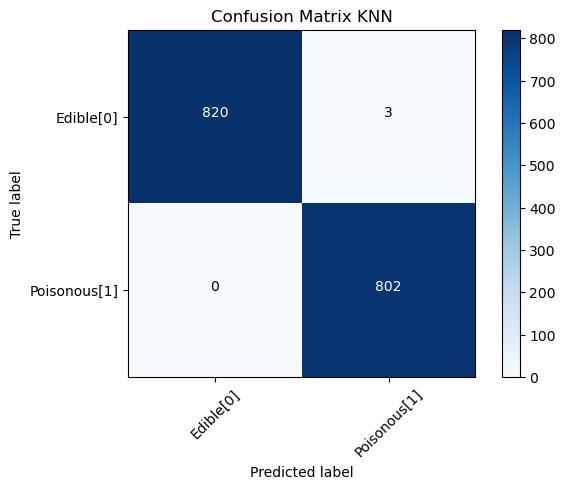

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[837   0]
 [  1 787]]


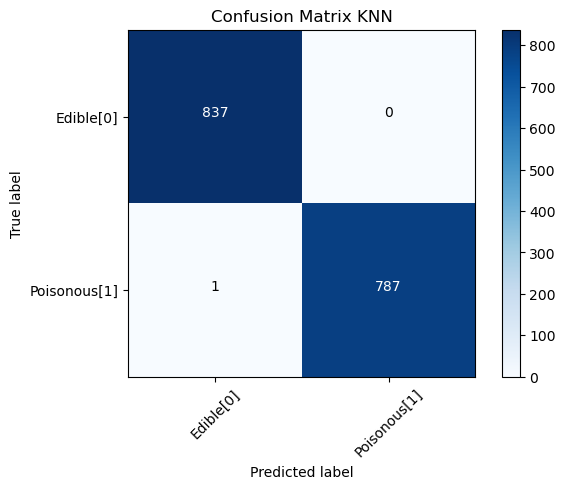

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

Confusion Matrix, without normalization
[[857   0]
 [  3 764]]


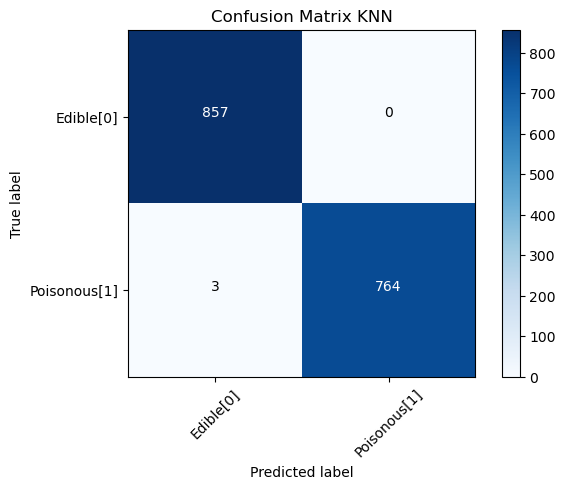

Average Train Accuracy Score of Model: 1.00
Average Test Accuracy Score of Model: 1.00
   Precision    Recall  F1 Score
0   0.998772  0.998769  0.998769
1   0.998772  0.998769  0.998769
2   0.998161  0.998154  0.998154
3   0.999385  0.999385  0.999385
4   0.998159  0.998153  0.998153
Average Precision: 0.999
Average Recall: 0.999
Average F1 Score: 0.999


KNeighborsClassifier()

In [39]:
train_model(KNeighborsClassifier(), 'KNN', X, Y, scale=False)

## Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       845
           1       0.97      1.00      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[825  20]
 [  0 780]]


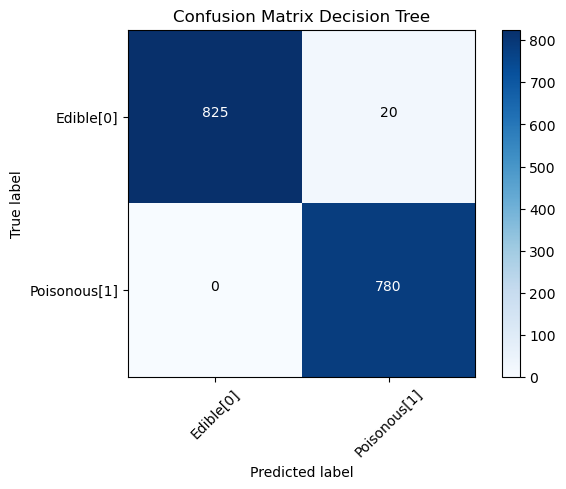

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       846
           1       0.97      1.00      0.98       779

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[822  24]
 [  0 779]]


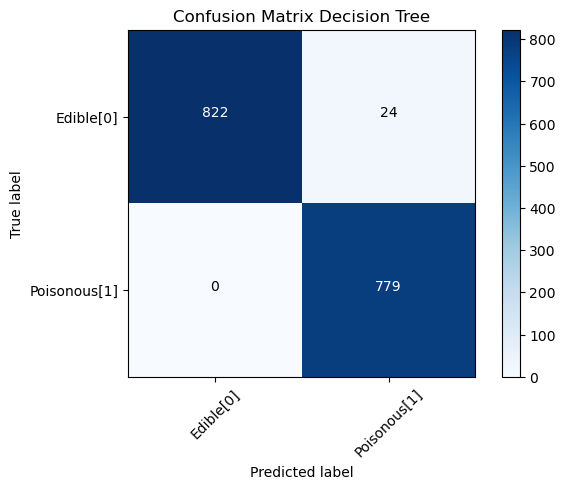

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       823
           1       0.97      1.00      0.99       802

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[802  21]
 [  0 802]]


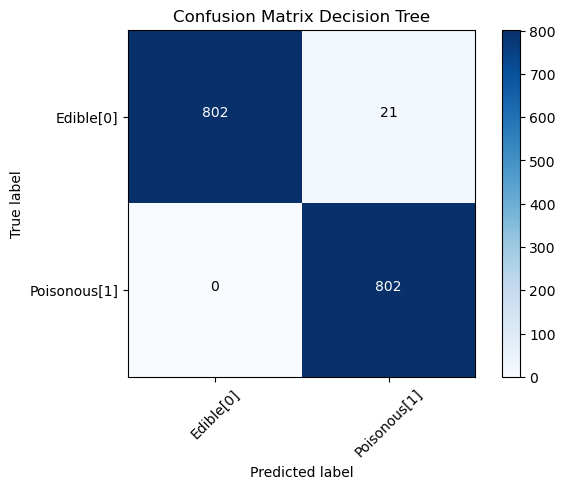

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       837
           1       0.98      1.00      0.99       788

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix, without normalization
[[818  19]
 [  0 788]]


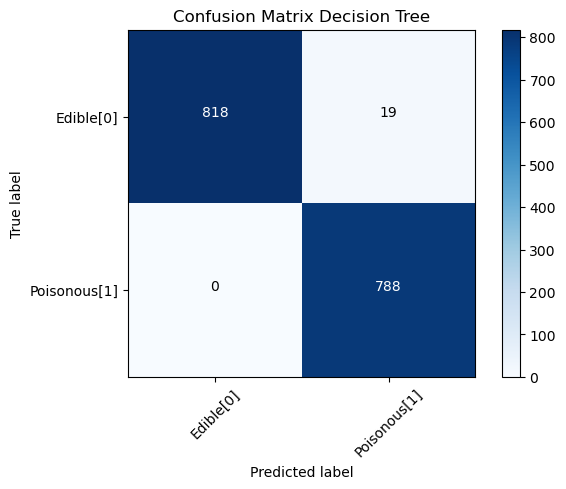

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       857
           1       0.97      1.00      0.99       767

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

Confusion Matrix, without normalization
[[837  20]
 [  0 767]]


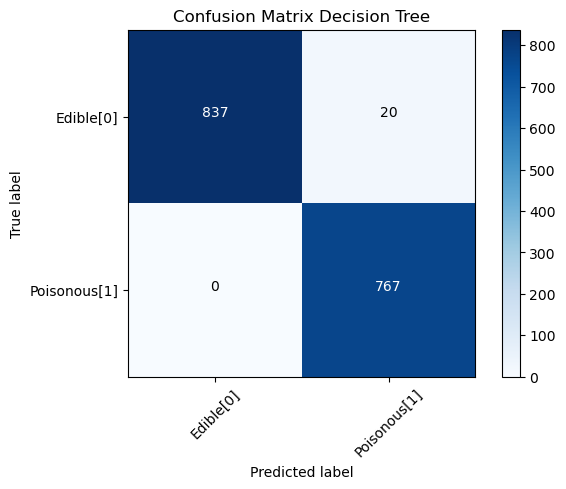

Average Train Accuracy Score of Model: 0.99
Average Test Accuracy Score of Model: 0.99
   Precision    Recall  F1 Score
0   0.988000  0.987692  0.987697
1   0.985672  0.985231  0.985237
2   0.987407  0.987077  0.987077
3   0.988583  0.988308  0.988310
4   0.987998  0.987685  0.987691
Average Precision: 0.988
Average Recall: 0.987
Average F1 Score: 0.987


In [40]:
clf_tree = train_model(DecisionTreeClassifier(criterion='entropy', max_depth=6), 'Decision Tree', X, Y, scale=False)

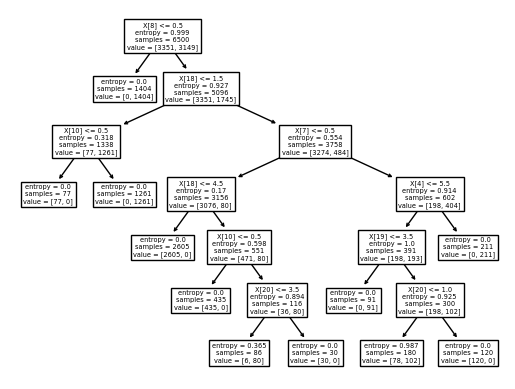

In [41]:
tree.plot_tree(clf_tree)
plt.show()

## Random Forest

RandomForestClassifier(max_features=5, n_estimators=20, random_state=0)
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[845   0]
 [  0 780]]


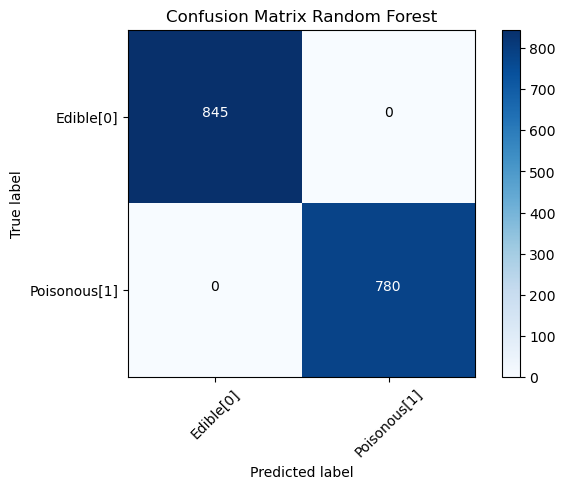

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[846   0]
 [  0 779]]


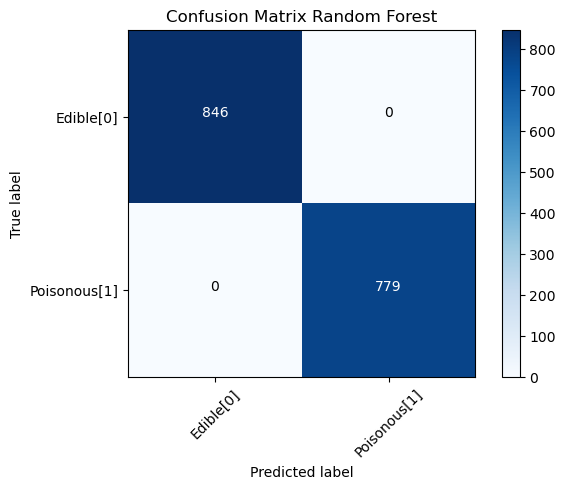

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[823   0]
 [  0 802]]


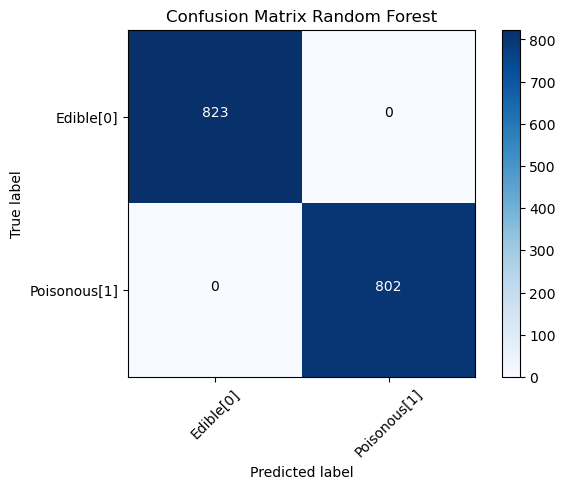

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[837   0]
 [  0 788]]


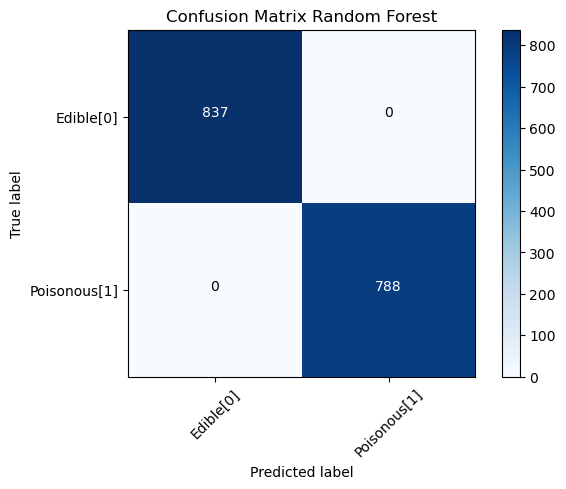

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

Confusion Matrix, without normalization
[[857   0]
 [  0 767]]


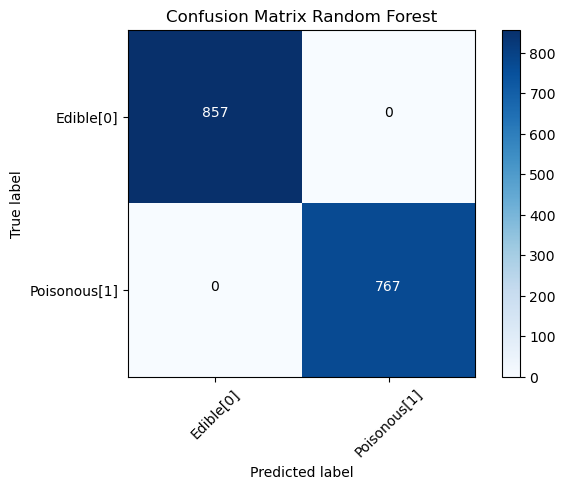

Average Train Accuracy Score of Model: 1.00
Average Test Accuracy Score of Model: 1.00
   Precision  Recall  F1 Score
0        1.0     1.0       1.0
1        1.0     1.0       1.0
2        1.0     1.0       1.0
3        1.0     1.0       1.0
4        1.0     1.0       1.0
Average Precision: 1.000
Average Recall: 1.000
Average F1 Score: 1.000


In [42]:
clf_rf = train_model(
    RandomForestClassifier(max_features=round(np.sqrt(len(X.columns))), n_estimators=20, random_state=0), 
    'Random Forest', 
    X, 
    Y, 
    scale=False
)

## Bagging

Lets add bagging to the decision trees and use the same parameters as above max_depth=6 and see whether there is any improvement to the model.

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6),
                  n_estimators=20, random_state=0)
Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[842   3]
 [  0 780]]


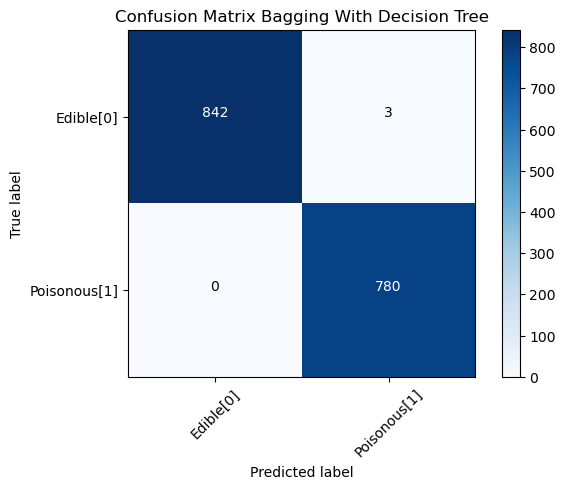

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[846   0]
 [  0 779]]


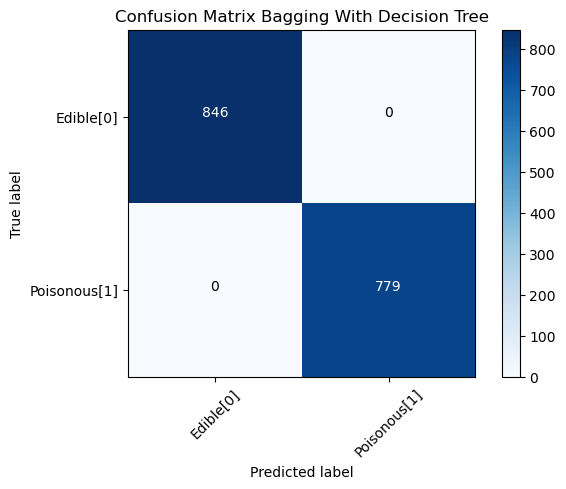

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[821   2]
 [  0 802]]


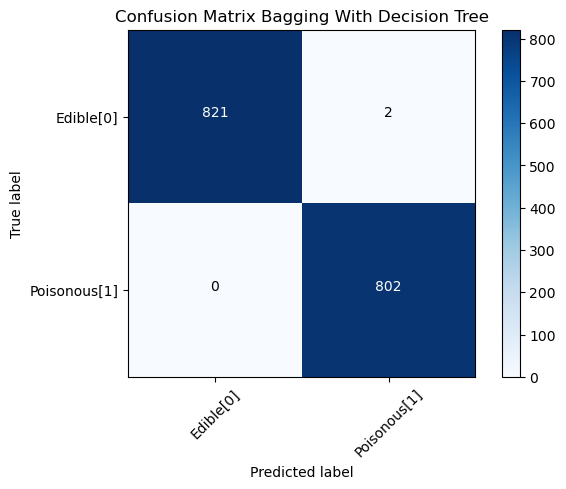

Dataset before split: (8124, 21) (8124,)
Train set after split: (6499, 21) (6499,)
Test set after split: (1625, 21) (1625,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix, without normalization
[[836   1]
 [  2 786]]


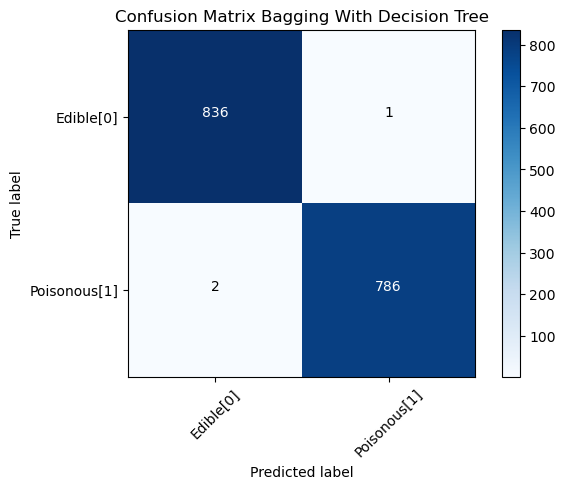

Dataset before split: (8124, 21) (8124,)
Train set after split: (6500, 21) (6500,)
Test set after split: (1624, 21) (1624,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

Confusion Matrix, without normalization
[[855   2]
 [  0 767]]


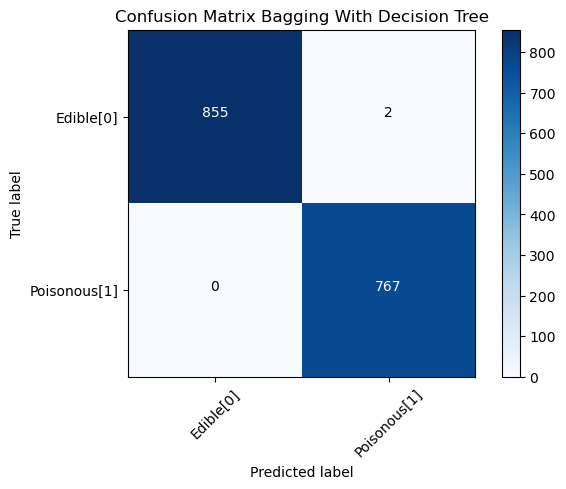

Average Train Accuracy Score of Model: 1.00
Average Test Accuracy Score of Model: 1.00
   Precision    Recall  F1 Score
0   0.998161  0.998154  0.998154
1   1.000000  1.000000  1.000000
2   0.998772  0.998769  0.998769
3   0.998155  0.998154  0.998154
4   0.998772  0.998768  0.998769
Average Precision: 0.999
Average Recall: 0.999
Average F1 Score: 0.999


In [43]:
from sklearn.ensemble import BaggingClassifier
clf_bagging = train_model(
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6), 
        n_estimators=20,
        random_state=0,
        bootstrap=True
    ),
    'Bagging With Decision Tree', 
    X, 
    Y, 
    scale=False
)

## Report

In [44]:
metrics_col = ['precision', 'recall', 'f1_score']

res = pd.DataFrame(model_scores).T
res.columns = metrics_col
res


,precision,recall,f1_score
Logistic Regression,0.950467,0.950394,0.950379
SVM,0.990784,0.990645,0.990641
KNN,0.998650,0.998646,0.998646
Decision Tree,0.987532,0.987198,0.987202
Random Forest,1.000000,1.000000,1.000000
Bagging With Decision Tree,0.998772,0.998769,0.998769


We can see that bagging improves the decision trees model by approximately 1~2%. Random Forest model performs the best among all other classification model. SVM, KNN, Bagging with Decision trees as base model and Decision trees perform quite well closed to 100% f1_score.